# Lab: Exploring a Dataset

We want to take a look at this real-world dataset:  
https://openneuro.org/datasets/ds005420/versions/1.0.0

The easiest way to download seems to be from this github repo:  
https://github.com/OpenNeuroDatasets/ds005420

In [1]:
import pathlib

In [2]:
path = pathlib.Path("../data/ds005420-download")

In [3]:
files = list(path.iterdir())
files[:10]

FileNotFoundError: [Errno 2] No such file or directory: '../data/ds005420-download'

In [ ]:
!which python

In [4]:
# Grab one file
file = "../data/ds005420-download/sub-1/eeg/sub-1_task-oa_eeg.edf"

In [5]:
import mne
content = mne.io.read_raw_edf(file)
data = content.get_data()

Extracting EDF parameters from /home/fdamicel/projects/python-course/data/ds005420-download/sub-1/eeg/sub-1_task-oa_eeg.edf...
EDF file detected


FileNotFoundError: [Errno 2] No such file or directory: '/home/fdamicel/projects/python-course/data/ds005420-download/sub-1/eeg/sub-1_task-oa_eeg.edf'

In [ ]:
data

Looks like a numpy array, check shape:

In [29]:
raw_data.shape

(20, 104000)

We saw that there are 20 channels per subject, so that looks like we have 20 time series of 1040000 steps.
Let's confirm the channels:

In [30]:
content.info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-A1A2, EEG Fp2-A1A2, EEG Fz-A1A2, EEG F3-A1A2, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 60.0 Hz
 meas_date: 2016-10-14 12:37:25 UTC
 nchan: 20
 projs: []
 sfreq: 500.0 Hz
 subject_info: 3 items (dict)
>

In [31]:
content.ch_names

['EEG Fp1-A1A2',
 'EEG Fp2-A1A2',
 'EEG Fz-A1A2',
 'EEG F3-A1A2',
 'EEG F4-A1A2',
 'EEG F7-A1A2',
 'EEG F8-A1A2',
 'EEG Cz-A1A2',
 'EEG C3-A1A2',
 'EEG C4-A1A2',
 'EEG T3-A1A2',
 'EEG T4-A1A2',
 'EEG Pz-A1A2',
 'EEG P3-A1A2',
 'EEG P4-A1A2',
 'EEG T5-A1A2',
 'EEG T6-A1A2',
 'EEG O1-A1A2',
 'EEG O2-A1A2',
 'EEG LOC-ROC']

In [32]:
len(content.ch_names)

20

In [22]:
channels

['EEG Fp1-A1A2',
 'EEG Fp2-A1A2',
 'EEG Fz-A1A2',
 'EEG F3-A1A2',
 'EEG F4-A1A2',
 'EEG F7-A1A2',
 'EEG F8-A1A2',
 'EEG Cz-A1A2',
 'EEG C3-A1A2',
 'EEG C4-A1A2',
 'EEG T3-A1A2',
 'EEG T4-A1A2',
 'EEG Pz-A1A2',
 'EEG P3-A1A2',
 'EEG P4-A1A2',
 'EEG T5-A1A2',
 'EEG T6-A1A2',
 'EEG O1-A1A2',
 'EEG O2-A1A2',
 'EEG LOC-ROC']

In [23]:
len(channels)

20

We can plot the time series:

In [33]:
# add matplotlib to pyproject.toml

In [34]:
import matplotlib.pyplot as plt

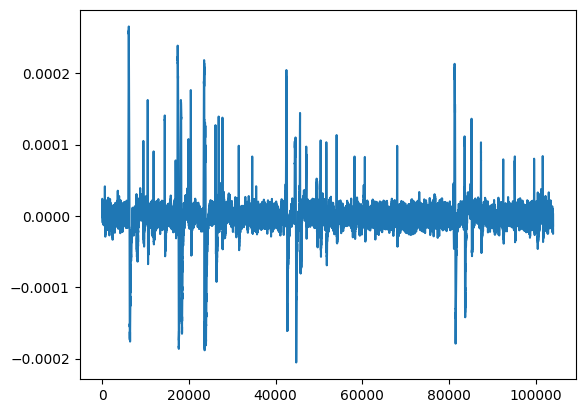

In [36]:
plt.plot(data[0])

Looks fine.
Now let's put the data into pandas dataframe which will be more convenient for further analysis and preprocessing:

In [37]:
import pandas as pd

**TODO:**
- move all imports to the top

In [39]:
len(content.ch_names), len(data)

(20, 20)

In [43]:
ts = dict(zip(content.ch_names, data))
ts

{'EEG Fp1-A1A2': array([ 1.05320562e-05,  1.09898195e-05,  9.76911736e-06, ...,
        -2.51734823e-05, -2.41053679e-05, -1.35768116e-05]),
 'EEG Fp2-A1A2': array([ 1.83455325e-06,  2.29231657e-06,  3.05525542e-06, ...,
        -3.01675542e-07, -4.11636982e-06, -8.38882742e-06]),
 'EEG Fz-A1A2': array([ 1.98714103e-06,  2.44490434e-06,  2.75007988e-06, ...,
        -7.32071302e-06, -6.40518639e-06, -3.04825542e-06]),
 'EEG F3-A1A2': array([6.71736193e-06, 7.78547633e-06, 8.85359073e-06, ...,
        4.27595759e-06, 7.02253748e-06, 6.25959862e-06]),
 'EEG F4-A1A2': array([ 2.75007988e-06,  3.66560651e-06,  3.81819428e-06, ...,
        -2.16639635e-05, -2.05958491e-05, -9.91470513e-06]),
 'EEG F7-A1A2': array([ 6.41218639e-06,  6.86994971e-06,  6.41218639e-06, ...,
         4.12336982e-06,  3.08675542e-07, -4.26895759e-06]),
 'EEG F8-A1A2': array([-2.71571233e-05, -3.32606341e-05, -3.61598018e-05, ...,
        -7.93106410e-06, -7.16812525e-06, -3.81119428e-06]),
 'EEG Cz-A1A2': array([8

Pandas dataframes can be constructed directly from such a dictionary:

In [46]:
ts = pd.DataFrame(ts)
ts.head()

,EEG Fp1-A1A2,EEG Fp2-A1A2,EEG Fz-A1A2,EEG F3-A1A2,EEG F4-A1A2,EEG F7-A1A2,EEG F8-A1A2,EEG Cz-A1A2,EEG C3-A1A2,EEG C4-A1A2,EEG T3-A1A2,EEG T4-A1A2,EEG Pz-A1A2,EEG P3-A1A2,EEG P4-A1A2,EEG T5-A1A2,EEG T6-A1A2,EEG O1-A1A2,EEG O2-A1A2,EEG LOC-ROC
0,0.000011,0.000002,0.000002,0.000007,0.000003,0.000006,-0.000027,0.000008,-0.000006,0.000006,0.000005,0.000006,0.000002,0.000007,0.000009,0.000005,0.000005,0.000009,0.000005,0.000003
1,0.000011,0.000002,0.000002,0.000008,0.000004,0.000007,-0.000033,0.000011,-0.000007,0.000008,0.000007,0.000009,0.000003,0.000010,0.000012,0.000006,0.000007,0.000011,0.000007,0.000004
2,0.000010,0.000003,0.000003,0.000009,0.000004,0.000006,-0.000036,0.000013,-0.000007,0.000010,0.000007,0.000011,0.000004,0.000012,0.000014,0.000007,0.000009,0.000013,0.000007,0.000005
3,0.000007,0.000004,0.000003,0.000010,0.000003,0.000005,-0.000036,0.000014,-0.000007,0.000011,0.000006,0.000013,0.000005,0.000013,0.000015,0.000007,0.000010,0.000013,0.000006,0.000004
4,0.000004,0.000005,0.000004,0.000011,0.000002,0.000003,-0.000034,0.000014,-0.000007,0.000012,0.000005,0.000013,0.000005,0.000013,0.000015,0.000006,0.000010,0.000012,0.000005,0.000002


Let's clean the column names:

In [47]:
ts.columns

Index(['EEG Fp1-A1A2', 'EEG Fp2-A1A2', 'EEG Fz-A1A2', 'EEG F3-A1A2',
       'EEG F4-A1A2', 'EEG F7-A1A2', 'EEG F8-A1A2', 'EEG Cz-A1A2',
       'EEG C3-A1A2', 'EEG C4-A1A2', 'EEG T3-A1A2', 'EEG T4-A1A2',
       'EEG Pz-A1A2', 'EEG P3-A1A2', 'EEG P4-A1A2', 'EEG T5-A1A2',
       'EEG T6-A1A2', 'EEG O1-A1A2', 'EEG O2-A1A2', 'EEG LOC-ROC'],
      dtype='object')

In [49]:
col = ts.columns[0]
col

'EEG Fp1-A1A2'

In [53]:
col[4:]

'Fp1-A1A2'

In [54]:
ts.columns = [col[4:] for col in ts.columns]
ts.head()

,Fp1-A1A2,Fp2-A1A2,Fz-A1A2,F3-A1A2,F4-A1A2,F7-A1A2,F8-A1A2,Cz-A1A2,C3-A1A2,C4-A1A2,T3-A1A2,T4-A1A2,Pz-A1A2,P3-A1A2,P4-A1A2,T5-A1A2,T6-A1A2,O1-A1A2,O2-A1A2,LOC-ROC
0,0.000011,0.000002,0.000002,0.000007,0.000003,0.000006,-0.000027,0.000008,-0.000006,0.000006,0.000005,0.000006,0.000002,0.000007,0.000009,0.000005,0.000005,0.000009,0.000005,0.000003
1,0.000011,0.000002,0.000002,0.000008,0.000004,0.000007,-0.000033,0.000011,-0.000007,0.000008,0.000007,0.000009,0.000003,0.000010,0.000012,0.000006,0.000007,0.000011,0.000007,0.000004
2,0.000010,0.000003,0.000003,0.000009,0.000004,0.000006,-0.000036,0.000013,-0.000007,0.000010,0.000007,0.000011,0.000004,0.000012,0.000014,0.000007,0.000009,0.000013,0.000007,0.000005
3,0.000007,0.000004,0.000003,0.000010,0.000003,0.000005,-0.000036,0.000014,-0.000007,0.000011,0.000006,0.000013,0.000005,0.000013,0.000015,0.000007,0.000010,0.000013,0.000006,0.000004
4,0.000004,0.000005,0.000004,0.000011,0.000002,0.000003,-0.000034,0.000014,-0.000007,0.000012,0.000005,0.000013,0.000005,0.000013,0.000015,0.000006,0.000010,0.000012,0.000005,0.000002


In [55]:
# Tip: sumsample for faster plotting

In [56]:
ts.iloc[0]

Fp1-A1A2    0.000011
Fp2-A1A2    0.000002
Fz-A1A2     0.000002
F3-A1A2     0.000007
F4-A1A2     0.000003
F7-A1A2     0.000006
F8-A1A2    -0.000027
Cz-A1A2     0.000008
C3-A1A2    -0.000006
C4-A1A2     0.000006
T3-A1A2     0.000005
T4-A1A2     0.000006
Pz-A1A2     0.000002
P3-A1A2     0.000007
P4-A1A2     0.000009
T5-A1A2     0.000005
T6-A1A2     0.000005
O1-A1A2     0.000009
O2-A1A2     0.000005
LOC-ROC     0.000003
Name: 0, dtype: float64

In [62]:
ts.shape

(104000, 20)

In [64]:
# Add seaborn to pyproject.toml

In [65]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [66]:
import seaborn as sns

In [67]:
ts.head(2)

,Fp1-A1A2,Fp2-A1A2,Fz-A1A2,F3-A1A2,F4-A1A2,F7-A1A2,F8-A1A2,Cz-A1A2,C3-A1A2,C4-A1A2,T3-A1A2,T4-A1A2,Pz-A1A2,P3-A1A2,P4-A1A2,T5-A1A2,T6-A1A2,O1-A1A2,O2-A1A2,LOC-ROC
0,0.000011,0.000002,0.000002,0.000007,0.000003,0.000006,-0.000027,0.000008,-0.000006,0.000006,0.000005,0.000006,0.000002,0.000007,0.000009,0.000005,0.000005,0.000009,0.000005,0.000003
1,0.000011,0.000002,0.000002,0.000008,0.000004,0.000007,-0.000033,0.000011,-0.000007,0.000008,0.000007,0.000009,0.000003,0.000010,0.000012,0.000006,0.000007,0.000011,0.000007,0.000004


<Axes: >

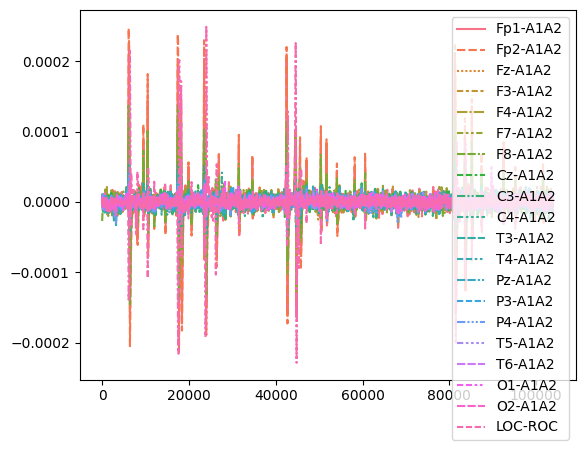

In [70]:
sns.lineplot(
    data=ts.iloc[::100, :]
)

Fine, but disturbing overlap.

In [73]:
sns.set() # Magic!

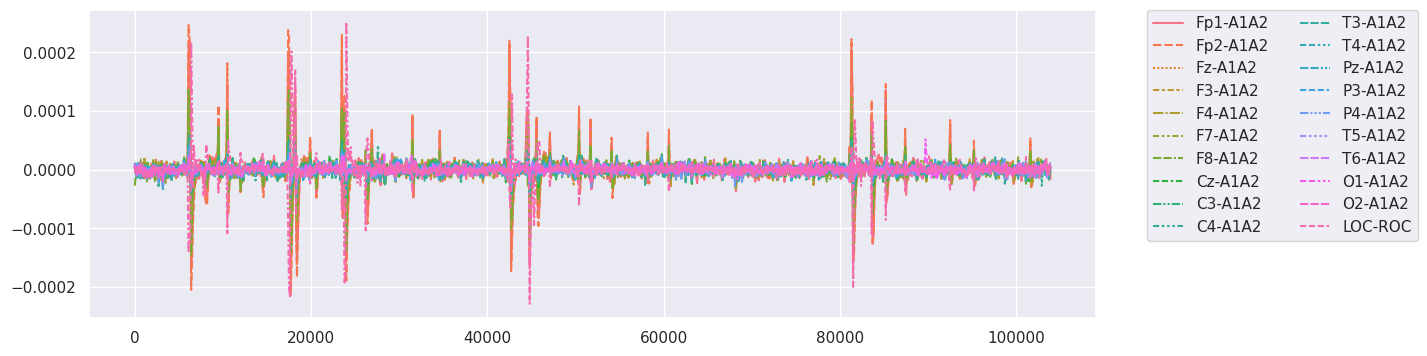

In [76]:
fig, ax = plt.subplots(figsize=(13, 4))
sns.lineplot(
    data=ts.iloc[::100, :],   # Subsample for fast plotting
    ax=ax
)
# Place the legend outside the plot in two columns
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, ncol=2)

Good enough, let's move on.